In [ ]:
# Read Data from google drive
from google.colab import drive #for loading gdrive data
from google.colab import files

# Load data from google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !sudo apt-get install tree -qq > /dev/null

In [ ]:
import sys
import os
import pandas as pd
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [ ]:
cd /content/gdrive/MyDrive/UCLA_Courses/

/content/gdrive/MyDrive/UCLA_Courses


In [ ]:
!tree YOLO -L 2

YOLO
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    ├── train.cache
    ├── val
    └── val.cache

6 directories, 2 files


In [ ]:
TRAIN_PATH = 'train'
VAL_PATH = 'val'
ROOT_PATH = 'YOLO/images/'
print(len(os.listdir(os.path.join(ROOT_PATH, TRAIN_PATH))))
print(len(os.listdir(os.path.join(ROOT_PATH, VAL_PATH))))

179
21


In [ ]:
%cd yolov5
# Training
!python train.py --img 640 --batch 16 --epochs 40 \
  --data ./data/ROI.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt \
  --name yolov5s_DBT_40 --cache

/content/gdrive/My Drive/UCLA_Courses/yolov5
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-5-10 torch 1.8.1+cu101 CPU

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='./data/ROI.yaml', device='', entity=None, epochs=40, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov5s_DBT_40', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5s_DBT_402', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-11 03:37:16.167381: I tensorflow/stream_executor/platfo

In [ ]:
pwd

'/content/gdrive/MyDrive/UCLA_Courses/YOLO/images/val'

In [ ]:
%cd yolov5
!python detect.py --weights weights/DBT5s_40_best.pt \
  --img 640 --conf 0.1 --source /content/gdrive/MyDrive/UCLA_Courses/YOLO/images/val/

[Errno 2] No such file or directory: 'yolov5'
/content/gdrive/MyDrive/UCLA_Courses/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/gdrive/MyDrive/UCLA_Courses/YOLO/images/val/', update=False, view_img=False, weights=['weights/DBT5s_40_best.pt'])
YOLOv5 🚀 2021-5-10 torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients
image 1/21 /content/gdrive/MyDrive/UCLA_Courses/YOLO/images/val/DBT-P00784_rcc_sequence0slice_19.png: 640x512 Done. (0.390s)
image 2/21 /content/gdrive/MyDrive/UCLA_Courses/YOLO/images/val/DBT-P00784_rmlo_sequence0slice_27.png: 640x512 Done. (0.380s)
image 3/21 /content/gdrive/MyDrive/UCLA_Courses/YOLO/images/val/DBT-P01110_lcc_sequence0slice_34.png: 640x544 1 benign, Don

In [ ]:
# !git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

In [ ]:
cd YOLO/images/val/

/content/gdrive/MyDrive/UCLA_Courses/YOLO/images/val


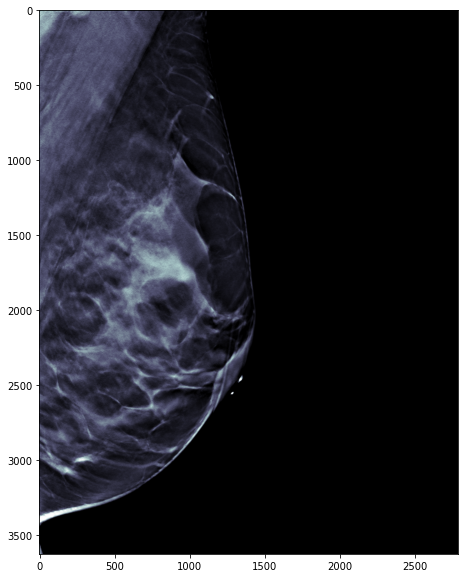

In [ ]:
# Read an example image
png_dir = '/content/gdrive/MyDrive/UCLA_Courses/YOLO/images/val/'
fname = 'DBT-P03203_lmlo_sequence0slice_38.png'
png_filename = os.path.join(png_dir, fname)
exp_img = plt.imread(fname = png_filename) 
plt.rcParams["figure.figsize"] = 10,10
plt.imshow(exp_img, cmap=plt.cm.bone)

In [ ]:
exp_label = pd.read_csv('/content/gdrive/MyDrive/UCLA_Courses/YOLO/labels/val/DBT-P03203_lmlo_sequence0slice_38.txt', delimiter = " ")
exp_label

,0,0.44576719576719576,0.6862026862026862,0.07354497354497354,0.10419210419210419,Unnamed: 5


In [ ]:
exp_label = [0,	0.44576719576719576,	0.6862026862026862,	0.07354497354497354,	0.10419210419210419	]
num_rows, num_cols = exp_img.shape[:2]
width_norm = exp_label[3]*num_cols
length_norm = exp_label[3]*num_rows
x = exp_label[1]*(num_cols)-width_norm/2
y = exp_label[2]*(num_rows)-length_norm/2

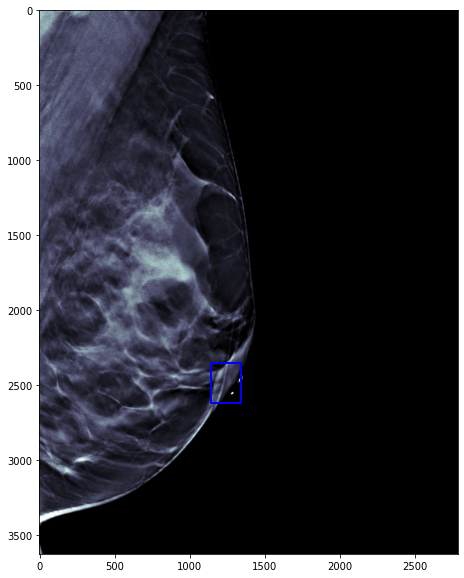

In [ ]:
plt.imshow(exp_img, cmap=plt.cm.bone)
rect = patches.Rectangle((x, y), width_norm, length_norm, linewidth=2, edgecolor='b', facecolor='none')
ax = plt.gca()
ax.add_patch(rect)
plt.show()